In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/aml2024-students-copy/MiniAssignments/ma03_2DGaussian

/content/drive/MyDrive/Colab Notebooks/aml2024-students-copy/MiniAssignments/ma03_2DGaussian


#  <font color='red'> Review of 2D Gaussian distribution  </font>


In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from numpy import linalg as la

## Set mean and covariance matrix and plot the pdf


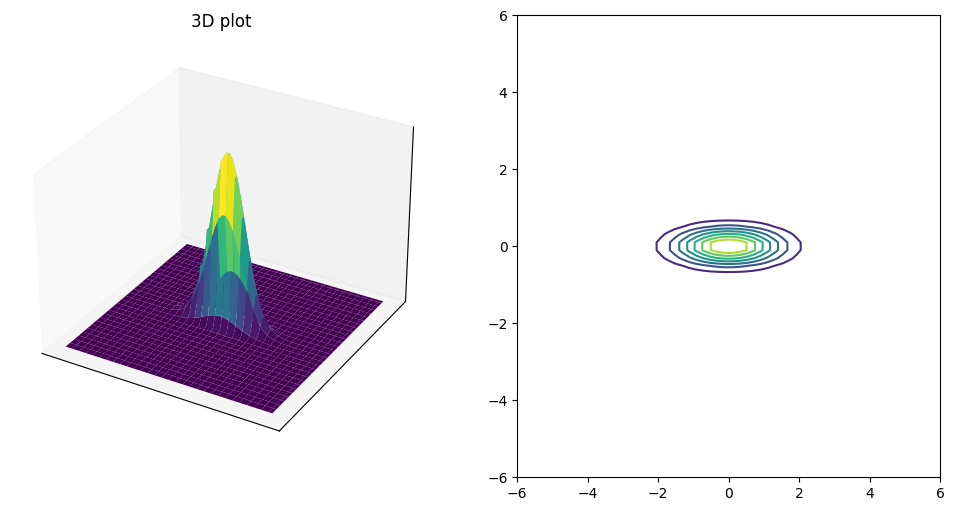

In [4]:
# Setting up the grid for plotting
N = 60
X = np.linspace(-6, 6, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Parameters of the Gaussian

mu = np.array([0, 0]) # Mean
sigma = np.array([[1, 0], [0, 0.1]]) # Covariance matrix

F = multivariate_normal(mu, sigma)
Z = F.pdf(pos)

# Plotting
fig1 = plt.figure(figsize=[12,6])
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z,cmap=cm.viridis)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title('3D plot')


ax2 = fig1.add_subplot(1, 2, 2)
cs = plt.contour(X,Y,Z)

# Gaussian with rotated coordinates

One can rotate the coordinates as $\mathbf R\mathbf x = \mathbf x'$, where $\mathbf R$ is a rotation matrix. Feeding the rotated coordinates to the Gaussian results in a rotated Gaussian. The covariance matrix of the rotated Gaussian is specified by $$\boldsymbol\Sigma' = \mathbf R^T \boldsymbol\Sigma \mathbf R$$

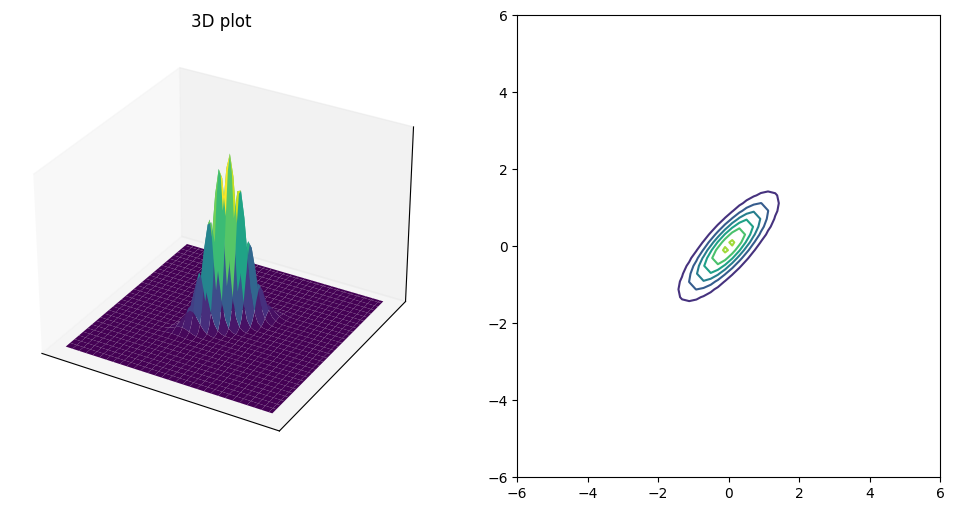

In [5]:
# Rotation matrix
R = np.array([[np.cos(np.pi/4), np.sin(np.pi/4)], [-np.sin(np.pi/4), np.cos(np.pi/4)]])
# Sandwitch
sigma_prime = R.T@sigma@R

F = multivariate_normal(mu, sigma_prime)
Z = F.pdf(pos)

# Plotting
fig1 = plt.figure(figsize=[12,6])
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z,cmap=cm.viridis)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title('3D plot')


ax2 = fig1.add_subplot(1, 2, 2)
cs = plt.contour(X,Y,Z)

# Determine the rotation matrix using eigen decomposition of the covariance matrix $\Sigma'$

<font color=red>YOUR CODE BELOW</red>

Eigen vectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigen values
[1.  0.1]


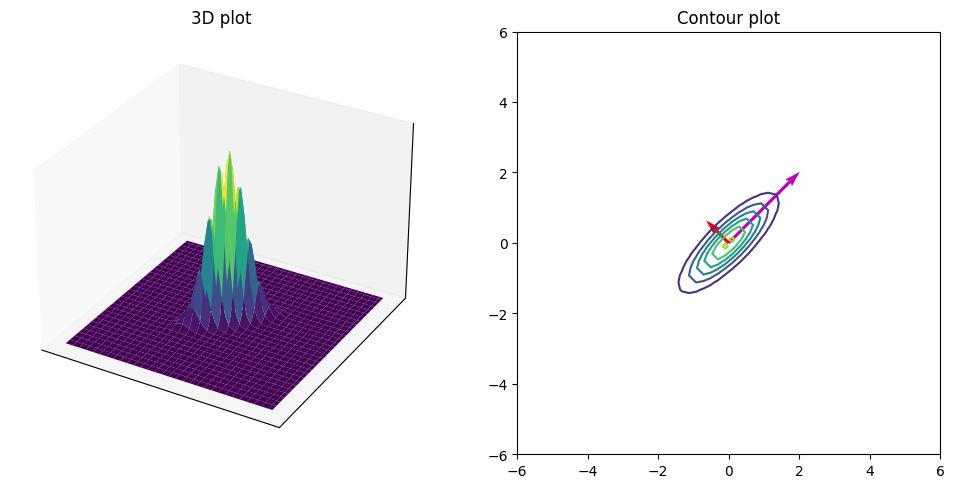

In [6]:
# Plotting
fig1 = plt.figure(figsize=[12,6])
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z,cmap=cm.viridis)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title('3D plot')


ax2 = fig1.add_subplot(1, 2, 2)
cs = plt.contour(X,Y,Z)

# Eigen decomposition of Sigma
lam, u = la.eig(sigma_prime)

print("Eigen vectors")
print(u)
print("Eigen values")
print(lam)


# Plot eigen values and vectors
origin = mu[0], mu[1] # origin point
eig_vec1 = 5*u[:,0]*np.sqrt(lam[0])
eig_vec2 = 5*u[:,1]*np.sqrt(lam[1])
plt.quiver(*origin, *eig_vec1, color=['m'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['r'], scale=21)
ax2.set_title('Contour plot')
ax2.set_aspect('equal')

plt.show()




## Draw samples from the distribution and plot

Note that the features are uncorrelated and are equally distributed (variance or spread  is the same in both directions)

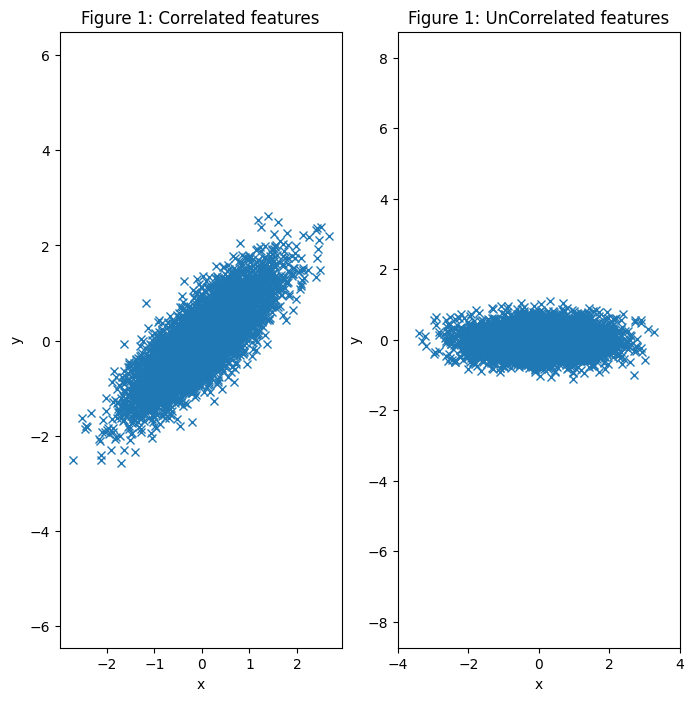

In [7]:
# Drawing Nsamples points from the Gaussian distribution
Nsamples = 5000

x1, y1 = np.random.multivariate_normal(mu, sigma_prime, Nsamples).T

# Plotting
fig, ax = plt.subplots(1,2,figsize=[8,8])
s=ax[0].plot(x1, y1, 'x')
s=ax[0].set_xlabel('x')
s=ax[0].set_ylabel('y')
s = ax[0].set_xlim(-4,4)
s = ax[0].set_ylim(-4,4)
s=ax[0].set_title("Figure 1: Correlated features")
s = ax[0].axis('equal')
x, y = np.random.multivariate_normal(mu, sigma, Nsamples).T

# Plotting
s=ax[1].plot(x, y, 'x')
s=ax[1].set_xlabel('x')
s=ax[1].set_ylabel('y')
s=ax[1].set_title("Figure 1: UnCorrelated features")
s = ax[1].axis('equal')
s = ax[1].set_xlim(-4,4)
s = ax[1].set_ylim(-4,4)


##  Scaled eigen vectors
    
Given the data (x1,y1), one can compute the co-variance matrix $\Sigma_\rm{\rm est}$. The off diagonal entries will indicate how correlated the features are. The eigen decomposition of $\Sigma_\rm{\rm est}$ can show the principal directions and scaling in each direction.
    

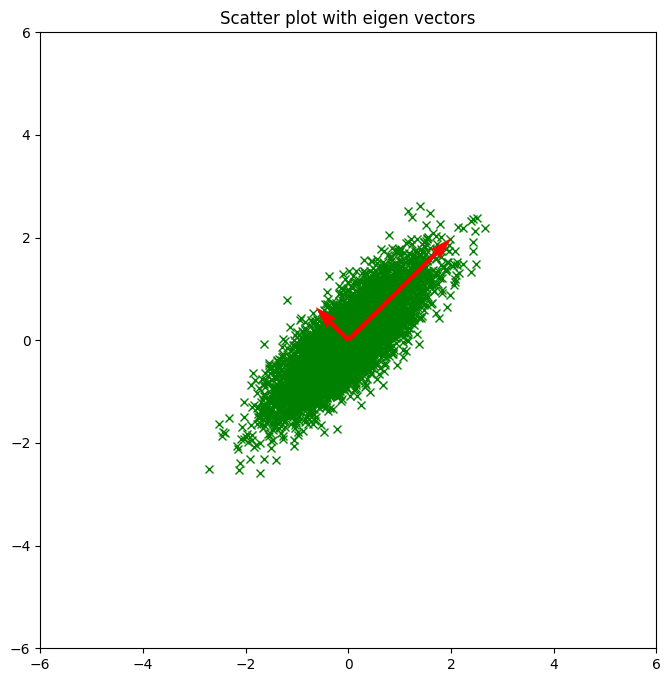

In [8]:
# Making data into a matrix
Data  = np.matrix([x1,y1])

# Estimating the mean and covariance matrix
mu_est = np.array((np.matrix.mean(Data,axis=1)))
Sigma_est = np.cov(Data)

# Plotting the features
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.gca()
cs = plt.plot(x1, y1, 'gx',zorder=1)
plt.xlim([-6,6])
plt.ylim([-6,6])

# Estimating the eigen vectors of the covariance matrix
lam, u = la.eig(Sigma_est)

# Origin of the vectors
origin = mu_est
# Eigen vectors scaled by the sqrt of the eigen values
eig_vec1 = 5*u[:,0]*np.sqrt(lam[0])
eig_vec2 = 5*u[:,1]*np.sqrt(lam[1])

plt.quiver(*origin, *eig_vec1, color=['r'], scale=21,zorder=2)
plt.quiver(*origin, *eig_vec2, color=['r'], scale=21,zorder=2)
ax1.set_title('Scatter plot with eigen vectors')
ax1.set_aspect('equal')

plt.show()

## <font color=red> To do \#1: Transform the samples using the eigen vectors </font>

The transformed vectors
$$\mathbf x_{\rm new} = \mathbf U^T (\mathbf x-\boldsymbol \mu)$$

will have a zero mean and zero correlation. Since the pdf is Gaussian, these variables will be independent.


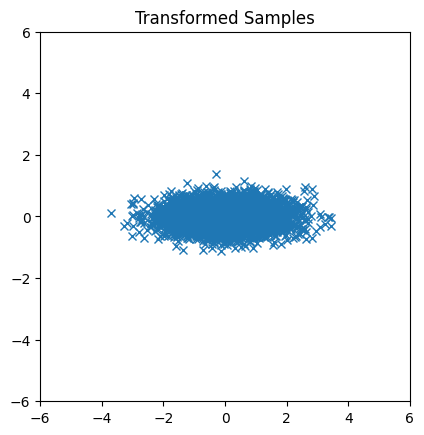

In [9]:
# Stacking features to a matrix
Data  = np.matrix([x1,y1])

# 1. Compute the mean and covariance matrix
# 2. Perform eigen decomposition of covariance matrix
# 3. Modify the code below to get uncorrelated and rotated features xnew
#---------------------------------------------------------------

# use np.diag to create diagonal matrix
rprime = u.T @ (Data - mu_est) # Another way to multuply is np.mult,in this case were using "@"
xnew = np.transpose(rprime[0,:])
ynew = np.transpose(rprime[1,:])

#---------------------------------------------------------------

# Plotting
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
plt.plot(xnew, ynew, 'x')
plt.xlim([-6,6])
plt.ylim([-6,6])
ax4.set_title('Transformed Samples')
ax4.set_aspect('equal')

mu_rotated = np.array((np.matrix.mean(rprime,axis=0)))
Sigma_rotated = np.cov(Data)


## <font color=red> To do \#2: Feature Normalization/Whitening  </font>
    
Most machine learning algorithms work well when the input features are "normalized" (e.g independent and are zero mean). We will now look at a data whitening transformation, which will take the original features and spit out normalized feaures.

Find the expression for the matrix A and vector b such that the transformed features
$$\mathbf x_{\rm new} = \mathbf A (\mathbf x - \boldsymbol \mu)$$

are uncorrelated and indentically distributed with zero mean as in Figure 1.

The $\mathbf A$ matrix can be obtained from the eigen decomposition of the covariance matrix $\boldsymbol \Sigma = \mathbf U \boldsymbol \Lambda \mathbf U^T$ as

$$\mathbf A = \Lambda^{-1/2}~\mathbf U^T $$

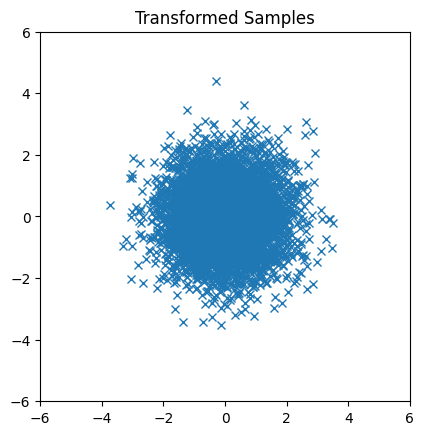

In [10]:
Data  = np.matrix([x1,y1])


# Transformation
# Modify the code below to get uncorrelated and uniformly distributed features
#---------------------------------------------------------------
x = np.sqrt(np.linalg.inv(np.diag(lam)))
rprime = (x @ u.T) @ (Data - mu_est)
xnew = np.transpose(rprime[0,:])
ynew = np.transpose(rprime[1,:])

#---------------------------------------------------------------

fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
plt.plot(xnew, ynew, 'x')
plt.xlim([-6,6])
plt.ylim([-6,6])
ax4.set_title('Transformed Samples')
ax4.set_aspect('equal')


